In [1]:
import requests
import pandas as pd
import os
from dotenv import load_dotenv
import json
from json import dumps, loads
from pandas import json_normalize
import re
from pandas.testing import assert_frame_equal
from pandas.testing import assert_series_equal
from datetime import datetime, timedelta
# import jqdatasdk as jq
import pytest

In [2]:
# import key

In [3]:
# pip install jqdatasdk

In [4]:
# pip install python-dotenv

In [5]:
# !brew install cookiecutter

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
load_dotenv()
# key = os.getenv('KEY')
# username = os.getenv('USERNAME')
# load_dotenv('/home/miguel/my_project/.env')
key = os.environ.get('KEY')
username = os.environ.get('USERNAME')

### Function 1

In [8]:
def attraction_id(name):
    """
This function discovers attraction_id by entering the name of the celebrity.
    
Parameters:
-----------
    name: name of celebrity(enter full name)

Returns:
--------
    Prints the status code of your call and if successful returns 
    The id from the most relevant result(shows the id of the first attraction)

Example:
-------
>>>> attraction_id(name = 'taylor_swift')
Status code: 200

'K8vZ9175Tr0'

>>>> attraction_id(name = 'taylor_swift')

Status code for attraction_id: 200

'K8vZ917Gku7'

    """
    link = f"https://app.ticketmaster.com/discovery/v2/attractions.json?keyword=" + name + f"&apikey={key}"
    attraction_id = requests.get(link)
    assert attraction_id.status_code == 200,"Your api url has an error status code."
    print ('Status code for attraction_id:',attraction_id.status_code)
    return attraction_id.json()['_embedded']['attractions'][0]['id']

### Test 1

In [9]:
def test_attraction_id():
    example = "taylor_swift"
    expected = "K8vZ9175Tr0"
    actual = attraction_id(name = example)
    assert expected == actual

In [10]:
test_attraction_id()

Status code for attraction_id: 200


### Function 2

In [11]:
def get_data(name):
    """
The function provides selected information about a certain celebrity - events names & links where you can 
purchase tickets & sales info & dates the events start & purchase limit - 

Parameters:
-----------
    name: name of celebrity(enter full name)

Returns:
--------
    Prints the status code of your call and, if successful returns 
    your desired data in a data frame format. 

Example:
-------
>>>> get_data(name = "taylor_swift")

Status code for attraction_id: 200
Status code for events: 200

	name	url	locale	sales	dates	ticketLimit
0	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-04-29	{'info': 'There is a six (6) ticket limit to t...
1	Taylor Swift w/ Paramore	https://www.ticketmaster.com/event/Z7r9jZ1AdQdFE	en-us	{'public': {'startTBD': True, 'startTBA': False}}	2023-03-17	NaN
2	Taylor Swift w/ Paramore	https://www.ticketmaster.com/event/Z7r9jZ1Ad_J_e	en-us	{'public': {'startTBD': True, 'startTBA': False}}	2023-03-18	NaN
3	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-03-24	{'info': 'There is a six (6) ticket limit to t...
4	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-03-25	{'info': 'There is a six (6) ticket limit to t...
5	Taylor Swift w/ Muna	https://www.ticketmaster.com/event/Z7r9jZ1AdQdjJ	en-us	{'public': {'startTBD': True, 'startTBA': False}}	2023-03-31	NaN
6	Taylor Swift w/ beabadoobee	https://www.ticketmaster.com/event/Z7r9jZ1Ad_J_8	en-us	{'public': {'startTBD': True, 'startTBA': False}}	2023-04-01	NaN
7	Taylor Swift w/ beabadoobee	https://www.ticketmaster.com/event/Z7r9jZ1Ad_J_a	en-us	{'public': {'startTBD': True, 'startTBA': False}}	2023-04-02	NaN
8	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-04-13	{'info': 'There is a six (6) ticket limit to t...
9	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-04-14	{'info': 'There is a six (6) ticket limit to t...
10	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-04-15	{'info': 'There is a six (6) ticket limit to t...
11	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-04-21	{'info': 'There is a six (6) ticket limit to t...
12	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-04-22	{'info': 'There is a six (6) ticket limit to t...
13	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-04-23	{'info': 'There is a six (6) ticket limit to t...
14	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-04-28	{'info': 'There is a six (6) ticket limit to t...
15	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-04-30	{'info': 'There is a six (6) ticket limit to t...
16	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-05-05	{'info': 'There is a six (6) ticket limit to t...
17	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-05-06	{'info': 'There is a six (6) ticket limit to t...
18	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-05-07	{'info': 'There is a six (6) ticket limit to t...
19	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-05-12	{'info': 'There is an overall 6 ticket limit f...

Notes: the table frame shown above is just an example
    """
    id = attraction_id(name)
    link = f'https://app.ticketmaster.com/discovery/v2/events.json?attractionId=' + id + f'&apikey={key}'
    events = requests.get(link)
    event = events.json()
    event_lst_dict = event['_embedded']['events']
    res_lst = []
    for i in range(len(event_lst_dict)):
        ev = {k:v for (k, v) in event_lst_dict[i].items() 
               if k in ['name','url','locale','dates','priceRanges','ticketLimit']}
        res_lst.append(ev)
    df = pd.DataFrame(res_lst)
    df['dates'] = df['dates'].apply(lambda x: x['start']['localDate'])
#     df['priceRanges'].fillna(9999, inplace=True)
    df.to_csv('ts_full_list.csv', index=False, header=True)
    assert events.status_code == 200,"Your api url has an error status code."
    print ('Status code for events:', events.status_code)
    return df

In [12]:
df = get_data(name='')

Status code for attraction_id: 200
Status code for events: 200


In [13]:
# df = get_data(name='taylor_swift')
# df.to_csv(r'/Users/jwfu/Desktop/Final_Project/ts_full.csv', index=False, header=True)

### Test 2

In [14]:
def test_get_data():
    path = 'ts_full_list.csv'
#     expected_df = pd.DataFrame(columns=['name', 'url', 'locale', 'dates', 'priceRanges', 'ticketLimit'])
    expected_df = get_data("taylor_swift")
    actual_df = pd.read_csv(path)
#     print(len(expected_df))
#     print(len(actual_df))
#     print(expected_df)
#     print(actual_df)
    expected_df.reset_index(drop=True).compare(actual_df.reset_index(drop=True))
    assert (expected_df.sort_index().sort_index(axis=1).columns == actual_df.sort_index().sort_index(axis=1).columns).all()
    

In [15]:
test_get_data()

Status code for attraction_id: 200
Status code for events: 200


### Function 3

In [16]:
# def validate_date(df):
#     df['dates'] = df['dates'].apply(lambda x: x['start']['localDate']).sort_values()
#     return df

def date_search(df, startdate, enddate):
    """
This function provided a selected time range for a certain celebrity 

Parameters:
-----------
    df: a dataframe defined as get_data(name)
    startdate: year-month-day
    enddate: year-month-day

Returns:
--------
    a dataframe in the selected time range

Example:
-------
>>>> date_search(df, startdate = '2023-03-01', enddate = '2023-03-31')

  	name	url	locale	sales	dates	ticketLimit
1	Taylor Swift w/ Paramore	https://www.ticketmaster.com/event/Z7r9jZ1AdQdFE	en-us	{'public': {'startTBD': True, 'startTBA': False}}	2023-03-17	NaN
2	Taylor Swift w/ Paramore	https://www.ticketmaster.com/event/Z7r9jZ1Ad_J_e	en-us	{'public': {'startTBD': True, 'startTBA': False}}	2023-03-18	NaN
3	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-03-24	{'info': 'There is a six (6) ticket limit to t...
4	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	{'public': {'startTBD': False, 'startTBA': Fal...	2023-03-25	{'info': 'There is a six (6) ticket limit to t...
5	Taylor Swift w/ Muna	https://www.ticketmaster.com/event/Z7r9jZ1AdQdjJ	en-us	{'public': {'startTBD': True, 'startTBA': False}}	2023-03-31	NaN

Notes: the table frame shown above is just an example

    """
    selector = (df['dates'] >= startdate) & (df['dates'] <= enddate)
    return df.loc[selector, :]


In [17]:
df2 = date_search(df, startdate = '', enddate = '')

In [18]:
# df2 = date_search(df, startdate = '2023-04-01', enddate = '2023-04-30')
# df2

In [19]:
# df2.to_csv(r'/Users/jwfu/Desktop/Final_Project/ts_april.csv', index=False, header=True)

### Test 3

In [20]:
def test_date_search():
    df = get_data(name='taylor_swift')
    expected_df = date_search(df, startdate = '2023-04-01', enddate = '2023-04-30')
    expected_df.to_csv('ts_april_list.csv', index=False, header=True)
    path ='ts_april_list.csv'  
    actual_df = pd.read_csv(path)
#     print(len(expected_df))
#     print(len(actual_df))
#     print(expected_df)
#     print(actual_df)
    expected_df.reset_index(drop=True).compare(actual_df.reset_index(drop=True))
    assert (expected_df.sort_index().sort_index(axis=1).columns == actual_df.sort_index().sort_index(axis=1).columns).all()


In [21]:
test_date_search()

Status code for attraction_id: 200
Status code for events: 200


### Function 4

In [22]:
def price_min(df2): 
    """
This function shows the minium prices of the events at the selected time range,

Parameters:
-----------
    df: a dataframe defined as date_search(df, startdate, enddate)

Returns:
--------
    a dataframe in the selected time range that sorted by min. ticket price

Example:
-------
>>>> number_limits(df2) #[where 'date_search(df, startdate = '2023-03-01', enddate = '2023-03-31')']

name	url	locale	dates	Minimum Price	ticketLimit
8	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	2023-04-13	49.0	8
9	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	2023-04-14	49.0	8
10	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	2023-04-15	49.0	8
11	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	2023-04-21	99.0	NaN
13	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	2023-04-23	99.0	NaN
14	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	2023-04-28	99.0	6
15	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	2023-04-30	99.0	6
0	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	2023-04-29	109.0	6
12	Taylor Swift | The Eras Tour	https://www.ticketmaster.com/taylor-swift-the-...	en-us	2023-04-22	109.0	NaN

Notes: the table frame shown above is just an example

    """
    df2 = df2[df2['priceRanges'].notna()]
    for index, row in df2.iterrows():
        
        df2['priceRanges'][index] = row['priceRanges'][0]['min']
#         print(df2['priceRanges'])
    
    idx = df2['ticketLimit'].isnull() 
#     print(-idx)
#     print(df2)
    df2.loc[-idx, 'ticketLimit'] = df2.loc[-idx, 'ticketLimit'].apply(lambda x: re.findall(r'\d+', x['info'])[0])
    a = df2[['name','url', 'locale', 'dates','priceRanges', 'ticketLimit']]
#     print(a.columns)
#     print(a)
    a = a.rename(columns={'priceRanges' : "Minimum Price"})
    return a.sort_values(by = ['Minimum Price'])

In [23]:
final = price_min(df2)

In [24]:
# final.to_csv(r'/Users/jwfu/Desktop/Final_Project/ts_final.csv', index=False, header=True)

### Test 4

In [25]:
def test_price_min():
    df = get_data(name='taylor_swift')
    df2 = date_search(df, startdate = '2023-04-01', enddate = '2023-04-30')
    expected_df = price_min(df2)
    expected_df.to_csv('ts_final_list.csv', index=False, header=True)
    path ='ts_final_list.csv'  
    actual_df = pd.read_csv(path)
#     print(len(expected_df))
#     print(len(actual_df))
#     print(expected_df)
#     print(actual_df)
    expected_df.reset_index(drop=True).compare(actual_df.reset_index(drop=True))
    assert (expected_df.sort_index().sort_index(axis=1).columns == actual_df.sort_index().sort_index(axis=1).columns).all()

In [26]:
test_price_min()

Status code for attraction_id: 200
Status code for events: 200


In [1]:
! pip install -i https://test.pypi.org/simple/ ticketmyra

Looking in indexes: https://test.pypi.org/simple/


pip install ticketmyra

In [27]:
!pytest -vv test.py

============================= test session starts ==============================
platform darwin -- Python 3.9.12, pytest-7.1.1, pluggy-1.0.0 -- /Users/jwfu/opt/anaconda3/bin/python
cachedir: .pytest_cache
rootdir: /Users/jwfu/Desktop/Final_Project
plugins: anyio-3.5.0
collected 4 items                                                              

test.py::test_attraction_id PASSED                                       [ 25%]
test.py::test_get_data PASSED                                            [ 50%]
test.py::test_date_search PASSED                                         [ 75%]
test.py::test_price_min PASSED                                           [100%]

=============================== warnings summary ===============================
test.py::test_price_min
  /Users/jwfu/Desktop/Final_Project/test.py:190: SettingWithCopyWarning: 
  A value is trying to be set on a copy of a slice from a DataFrame
  
  See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

# Link to your TestPyPi package and the repo of your package

https://test.pypi.org/project/ticketmyra/

https://github.com/QMSS-G5072-2022/ticketmyra

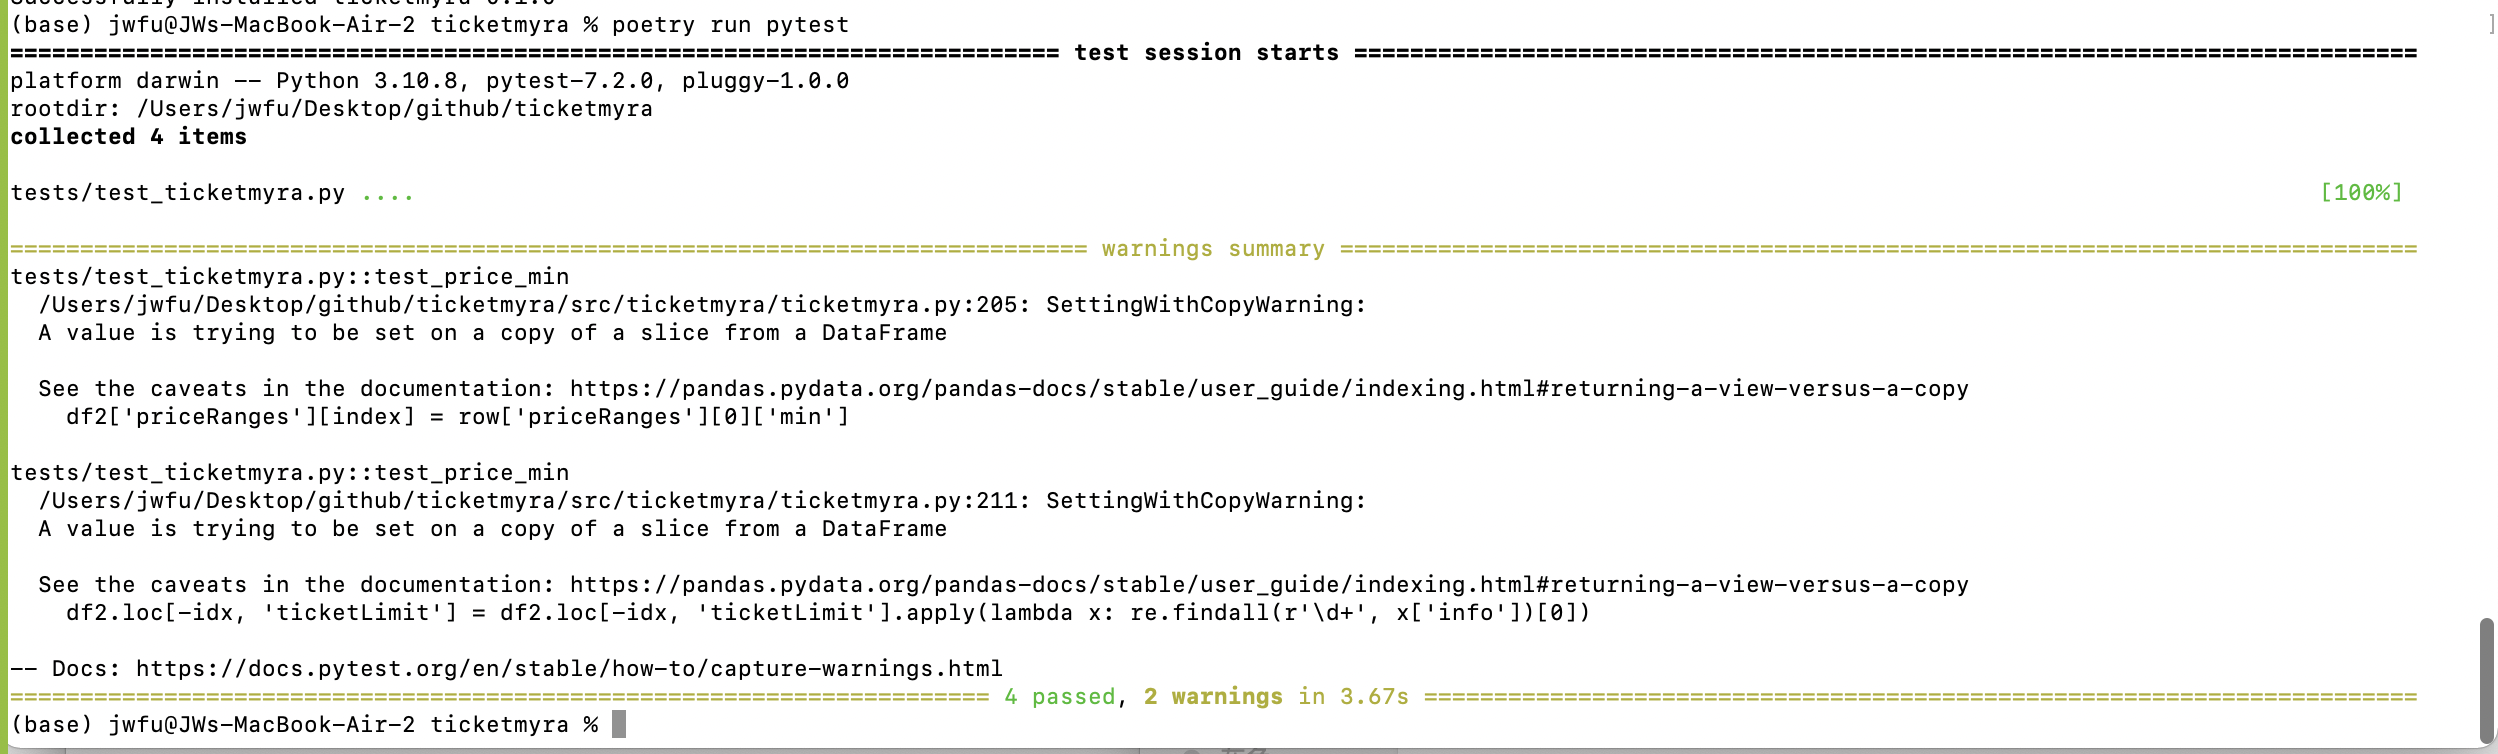